In [1]:
import pandas as pd
import seaborn as sns
#reading freesurfer results
out_dir = '/output'
fsdata_file = out_dir+'/freesurfer_out.csv'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);
tab_data.shape

## 1. basics: age, diagnosis
## 2. subcortical and basic segmentation 
# Basal Ganglia: Left-Caudate, Right-Caudate, Left-Pallidum, Right-Pallidum, Left-Putamen, Right-Putamen, 
#                Left-Thalamus-Proper, Right-Thalamus-Proper
# sub-cortical: SubCortGrayVol, Left-Accumbens-area, Right-Accumbens-area, Left-Amygdala, Right-Amygdala, Left-Hippocampus, Right-Hippocampus,  	
# Ventricles: CSF, Left-Lateral-Ventricle, Right-Lateral-Ventricle, 3rd-Ventricle, 4th-Ventricle, 5th-Ventricle,
#             Left-VentralDC, Left-VentralDC, (Ventral Diencephalon)
# Ventricles unknown: Left-Inf-Lat-Vent, Right-Inf-Lat-Vent, Right-VentralDC
# CC: CC_Anterior, CC_Mid_Anterior, CC_Central, CC_Mid_Posterior, CC_Posterior
# Brain-Stem: Brain-Stem, Accumbens, Left-choroid-plexus, Right-choroid-plexus,
# Cerebellum: Left-Cerebellum-Cortex, Right-Cerebellum-Cortex, Left-Cerebellum-White-Matter, Right-Cerebellum-White-Matter
# Vol sum: CortexVol, TotalGrayVolCortexVol, SubCortGrayVol, CerebralWhiteMatterVol,   
#          SupraTentorialVol, SupraTentorialVolNotVentVox, SupraTentorialVolNotVent, 
#          EstimatedTotalIntraCranialVol (eTIV), 
#          (lhCortexVol, rhCortexVol),  (lhCerebralWhiteMatterVol, rhCerebralWhiteMatterVol), 
# lesion: WM-hypointensities, (Left-WM-hypointensities, Right-WM-hypointensities),
#         non-WM-hypointensities (Left-non-WM-hypointensities, Right-non-WM-hypointensities),
# others in brain: Optic-Chiasm, Left-vessel, Right-vessel,
#                  BrainSegVol, BrainSegVolNotVent, BrainSegVolNotVentSurf, BrainSegVol-to-eTIV, MaskVol-to-eTIV, 
# others non-brain:  MaskVol, SurfaceHoles, lhSurfaceHoles, rhSurfaceHoles

## White Matter in Desikan Region
# Sum: CerebralWhiteMatterVol, MaskVol, EstimatedTotalIntraCranialVol, (lhCerebralWhiteMatterVol, rhCerebralWhiteMatterVol), 
# Left: wm-lh-bankssts, wm-lh-caudalanteriorcingulate, wm-lh-caudalmiddlefrontal, wm-lh-cuneus, wm-lh-entorhinal, wm-lh-fusiform,
# wm-lh-inferiorparietal, wm-lh-inferiortemporal, wm-lh-isthmuscingulate, wm-lh-lateraloccipital, wm-lh-lateralorbitofrontal, 
# wm-lh-lingual, wm-lh-medialorbitofrontal, wm-lh-middletemporal, wm-lh-parahippocampal, wm-lh-paracentral, wm-lh-parsopercularis, wm-lh-parsorbitalis
# wm-lh-parstriangularis, wm-lh-pericalcarine, wm-lh-postcentral, wm-lh-posteriorcingulate, wm-lh-precentral, wm-lh-precuneus, wm-lh-rostralanteriorcingulate
# wm-lh-rostralmiddlefrontal, wm-lh-superiorfrontal, wm-lh-superiorparietal, wm-lh-superiortemporal, wm-lh-supramarginal, wm-lh-frontalpole, 
# wm-lh-temporalpole, wm-lh-transversetemporal, wm-lh-insula, 
# Right: wm-rh-bankssts, wm-rh-caudalanteriorcingulate, wm-rh-caudalmiddlefrontal, wm-rh-cuneus, wm-rh-entorhinal, wm-rh-fusiform,
# wm-rh-inferiorparietal, wm-rh-inferiortemporal, wm-rh-isthmuscingulate, wm-rh-lateraloccipital, wm-rh-lateralorbitofrontal,
# wm-rh-lingual, wm-rh-medialorbitofrontal, wm-rh-middletemporal, wm-rh-parahippocampal, wm-rh-paracentral, wm-rh-parsopercularis, wm-rh-parsorbitalis
# wm-rh-parstriangularis, wm-rh-pericalcarine, wm-rh-postcentral, wm-rh-posteriorcingulate, wm-rh-precentral, wm-rh-precuneus, wm-rh-rostralanteriorcingulate
# wm-rh-rostralmiddlefrontal, wm-rh-superiorfrontal, wm-rh-superiorparietal, wm-rh-superiortemporal, wm-rh-supramarginal, wm-rh-frontalpole,
# wm-rh-temporalpole, wm-rh-transversetemporal, wm-rh-insula, 
# others: Left-UnsegmentedWhiteMatter, Right-UnsegmentedWhiteMatter	
    
## 3. cortical parcellation
# 


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


(102, 735)

In [6]:
import scipy.stats as stats
# ['Left-Hippocampus', 'Right-Hippocampus', 'Left-Amygdala', 'Right-Amygdala']
fvalue, pvalue = stats.f_oneway(tab_data['Left-Hippocampus'], tab_data['Right-Hippocampus'],
                                tab_data['Left-Amygdala'], tab_data['Right-Amygdala'])
print(fvalue, pvalue)

# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
# reshape the d dataframe suitable for statsmodels package 
d_melt = pd.melt(tab_data.reset_index(), id_vars=['index'],
                 value_vars=['Left-Hippocampus', 'Right-Hippocampus',
                             'Left-Amygdala', 'Right-Amygdala'])
# replace column names
d_melt.columns = ['index', 'treatments', 'value']
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

# load packages
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
import scipy.stats as stats
w, pvalue = stats.bartlett(tab_data['Left-Hippocampus'], tab_data['Right-Hippocampus'],
                           tab_data['Left-Amygdala'], tab_data['Right-Amygdala'])
print(w, pvalue)

1276.3727617022291 1.2243393211263973e-205
0.9982470870018005 0.9547800421714783
57.448374213694315 2.0615531623149535e-12


In [ ]:
import pandas as pd
import seaborn as sns
# load data file
d = tab_data
# reshape the d dataframe suitable for statsmodels package 
# you do not need to reshape if your data is already in stacked format. Compare d and d_melt tables for detail 
# understanding 
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])
# replace column names
d_melt.columns = ['Genotype', 'years', 'value']
d_melt.head()

In [3]:
# for test
import numpy as np
from matplotlib import pyplot as plt
def diagnosis2num(diagnosis):
    if diagnosis == "PD":
        return 1
    elif diagnosis == "ET":
        return -1
    elif diagnosis == "NC":
        return 0
    else:
        print("diagnosis input error...")
        return ""

num_data = tab_data.copy(deep=True);
#num_data["pd_nc_et"] 
num_data.loc[:, ['diagnosis']] = num_data['diagnosis'].apply(lambda v: diagnosis2num(v))
num_data.loc[:, ['sex']] = [1 if x == 'M' else 0 for x in num_data['sex'] ]
#num_data.to_csv(out_dir+'/freesurfer_out_num.csv')
#num_data.diagnosis

In [ ]:
dir(tab_data)

In [23]:
# classification test
# random forest
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X,  y)
RF.predict(X.iloc[460:,:])
round(RF.score(X,y), 4)
## neural networks
import sklearn as sk
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, y)
NN.predict(X.iloc[460:,:])
round(NN.score(X,y), 4)

NameError: name 'X' is not defined

In [ ]:
# for test
import numpy as np
from matplotlib import pyplot as plt
pd_nc_data = tab_data[(tab_data["diagnosis"]=="PD") | (tab_data["diagnosis"]=="ET")]
pd_nc_data['y'] = [1 if x == 'PD' else 0 for x in pd_nc_data['diagnosis'] ]
pd_nc_data.drop(['diagnosis'], axis=1, inplace=True)
pd_nc_data.loc[:,['sex']] = [1 if x == 'M' else 0 for x in pd_nc_data['sex'] ]

x = pd_nc_data.drop(['y'], axis=1);
#x = tab_data.drop(["sex","diagnosis"], axis=1)
a=np.sum(np.isnan(x), axis=0)
b=np.where(np.isnan(x))[1]
c=np.unique(b)
print(c)
d=x.columns
e=list(d[c])
tab_data.shape
print(np.array(x))

#fig, ax = plt.subplots(figsize=(6,40))
#im = ax.imshow(np.log(np.array(x).T), vmin=-25, vmax=25, cmap='RdBu')
#cbar = fig.colorbar(im)
#cbar.ax.set_ylabel('log')

#[523 524 525 526 531 661 663 664]
#['rh_Lat_Fis-ant-Vertical_area', 'rh_Lat_Fis-ant-Vertical_meancurv', 'rh_Lat_Fis-ant-Vertical_thickness', 
#'rh_Lat_Fis-ant-Vertical_volume', 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv', 'rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area']
# PD/NC
# ET/NC
# [531 661 663 664]
# ['rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv', 'rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area']
# PD/ET
# [523 524 525 526 531 661 663 664]
# ['rh_Lat_Fis-ant-Vertical_area', 'rh_Lat_Fis-ant-Vertical_meancurv', 'rh_Lat_Fis-ant-Vertical_thickness', 'rh_Lat_Fis-ant-Vertical_volume', 
# 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv', 'rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area']
# PD lacking: 523,524,525,526: 'rh_Lat_Fis-ant-Vertical_area', 'rh_Lat_Fis-ant-Vertical_meancurv', 'rh_Lat_Fis-ant-Vertical_thickness', 'rh_Lat_Fis-ant-Vertical_volume',
# ET lacking: 531,661,663,664 : 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv','rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area'
# NC lacking: 531,661,663,664  : 'rh_MeanThickness_thickness', 'rh_S_temporal_transverse_meancurv','rh_S_temporal_transverse_volume', 'rh_WhiteSurfArea_area' 

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/miniconda/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[0.5        0.5        0.5        0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.57142857 0.57142857] [0.57142857 0.57142857 0.5        0.5        0.5        0.5
 0.5        0.5        0.5        0.66666667] [0.57142857 0.57142857 0.57142857 0.57142857 0.57142857 0.57142857
 0.57142857 0.57142857 0.57142857 0.66666667]


Text(0.5, 0, 'Validations')

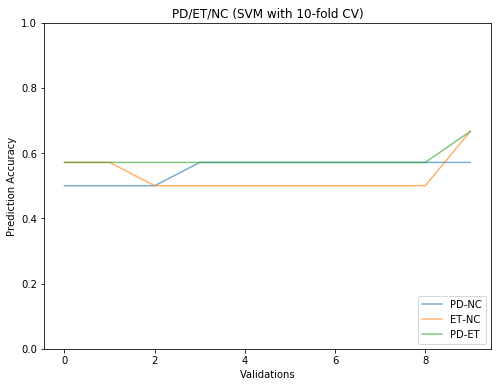

In [31]:
# prediciton with all freesurfer output features
# read corr data and function init
import numpy as np
def get_group(df, groups):
    res = df[(df["diagnosis"]==groups[0]) | (df["diagnosis"]==groups[1])];
    res['y'] = [1 if x == groups[0] else 0 for x in res['diagnosis']]
    res.drop(['diagnosis'], axis=1, inplace=True);
    res['sex'] = [1 if x == 'M' else 0 for x in res['sex'] ]
    return res
def cv_score(X, N_cv):
    from sklearn import svm
    from sklearn.model_selection import cross_val_score
    y = X['y'];
    data=X.drop(['y'], axis=1);
    clf = svm.SVC(kernel='sigmoid', C=1)
    scores = cross_val_score(clf, np.array(data), np.array(y), cv=N_cv)
    m_list= scores;
    return m_list

N_cv=10
# AD-IC ic in PD/NC in both datasets
#import matplotlib.pyplot as plt
pd_nc_data = get_group(tab_data, ["PD", "NC"])
et_nc_data = get_group(tab_data, ["ET", "NC"])
pd_et_data = get_group(tab_data, ["PD", "ET"])
res1 = cv_score(pd_nc_data, N_cv)
res2 = cv_score(et_nc_data, N_cv)
res3 = cv_score(pd_et_data, N_cv)
print(res1, res2, res3)
fig = plt.figure(figsize=[8, 6])
plt.plot(res1, alpha=.6, label='PD-NC')
plt.plot(res2, alpha=.6, label='ET-NC')
plt.plot(res3, alpha=.6, label='PD-ET')
plt.legend(loc='lower right')
plt.title('PD/ET/NC (SVM with 10-fold CV)')
plt.ylim(0, 1)
plt.ylabel("Prediction Accuracy")
plt.xlabel("Validations")
#  PD/NC: array([0.5, 0.5, 0.5, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857])
# PD/ET: 0.5714285714285714,  0.6666666666666666

In [154]:
n_score

array([0.52631579, 0.55555556, 0.55555556, 0.55555556])

Text(0.5, 1.05, 'Brain Structures (Ratio): cerebrum, cerebellum, subcortical and brain-stem')

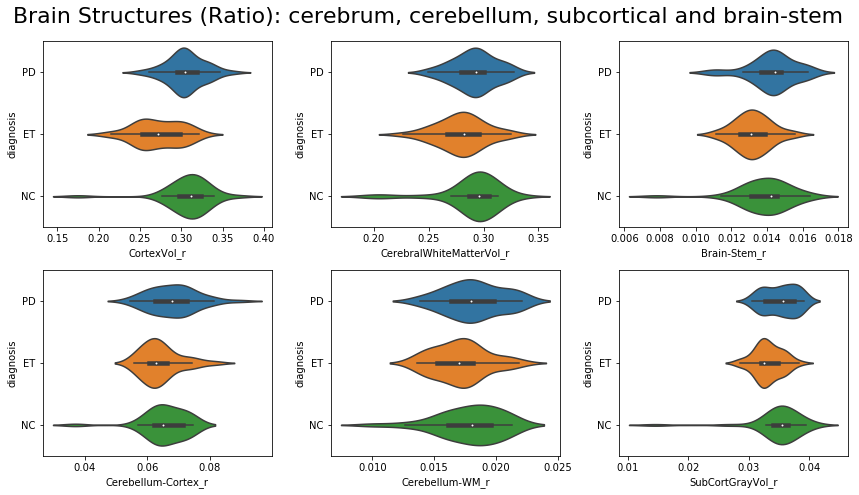

In [9]:
# distribution of large brain parts ratio
items_disp = ["diagnosis", "age", "sex", "eTIV", "CortexVol", "CerebralWhiteMatterVol",
              "Brain-Stem", "SubCortGrayVol"]
tmp_data = tab_data.copy(); 
tmp_data=tmp_data[items_disp];
tmp_data["Cerebellum-Cortex"] = tab_data["Left-Cerebellum-Cortex"]      +tab_data["Right-Cerebellum-Cortex"];
tmp_data["Cerebellum-WM"]     = tab_data["Left-Cerebellum-White-Matter"]+tab_data["Right-Cerebellum-White-Matter"];
items_disp=items_disp+["Cerebellum-Cortex", "Cerebellum-WM"]
items_disp_r = [x+"_r" for x in items_disp]
for i_feature in range(4, len(items_disp),1):
    tmp_data[items_disp_r[i_feature]] = tmp_data[items_disp[i_feature]]/tmp_data["eTIV"]
    
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1)
#
#ylim_2 = [300000, 600000]
sns.violinplot(y="diagnosis", x=items_disp_r[4], data=tmp_data, orient = 'h', inner='box', ax=axs[0, 0]); #axs[0,1].set_ylim(ylim_2);
#ylim_3 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp_r[5], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 1]); #axs[1,0].set_ylim(ylim_3);
#ylim_4 = [10000, 35000];
sns.violinplot(y="diagnosis", x=items_disp_r[6], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 2]); #axs[1,1].set_ylim(ylim_2);
#ylim_5 = [30000, 80000];
sns.violinplot(y="diagnosis", x=items_disp_r[7], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 2]); #axs[2,0].set_ylim(ylim_3);
#ylim_6 = [70000, 140000];
sns.violinplot(y="diagnosis", x=items_disp_r[8], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 0]); #axs[2,1].set_ylim(ylim_3);
#ylim_4 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp_r[9], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 1]); #axs[3,0].set_ylim(ylim_4);
fig.suptitle('Brain Structures (Ratio): cerebrum, cerebellum, subcortical and brain-stem', fontsize=22, x=0.5, y=1.05)
#
#plt.savefig('ad_group_corr_ic0.png')

In [8]:
items_disp_r[i_feature]

'r_diagnosis'

/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1.05, 'Brain Structures: cerebrum, cerebellum, subcortical and brain-stem')

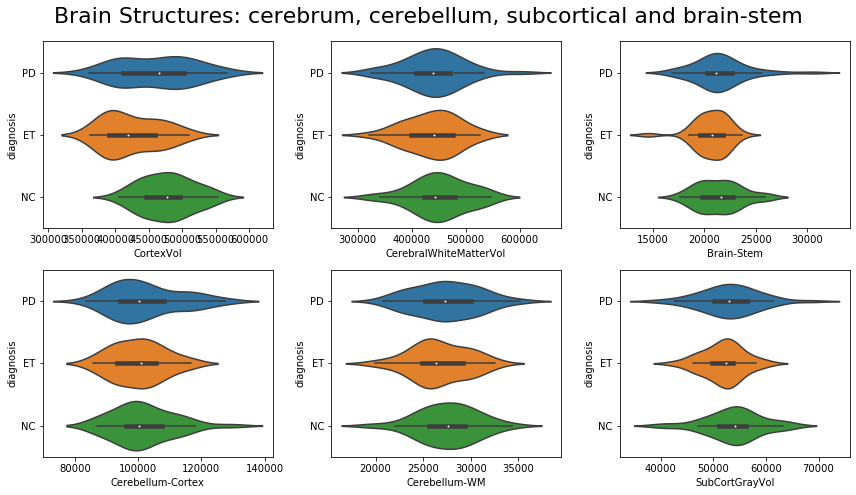

In [168]:
# distribution of large brain parts
items_disp = ["diagnosis", "age", "sex", "eTIV", "CortexVol", "CerebralWhiteMatterVol",
              "Brain-Stem", "SubCortGrayVol"]
tmp_data = tab_data[items_disp]; 
tmp_data["Cerebellum-Cortex"] = tab_data["Left-Cerebellum-Cortex"]      +tab_data["Right-Cerebellum-Cortex"];
tmp_data["Cerebellum-WM"]     = tab_data["Left-Cerebellum-White-Matter"]+tab_data["Right-Cerebellum-White-Matter"];
items_disp=items_disp+["Cerebellum-Cortex", "Cerebellum-WM"]

from matplotlib import pyplot as plt
fig, axs = plt.subplots(2, 3, figsize=(12,6.5), tight_layout=1)
#
#ylim_2 = [300000, 600000]
sns.violinplot(y="diagnosis", x=items_disp[4], data=tmp_data, orient = 'h', inner='box', ax=axs[0, 0]); #axs[0,1].set_ylim(ylim_2);
#ylim_3 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp[5], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 1]); #axs[1,0].set_ylim(ylim_3);
#ylim_4 = [10000, 35000];
sns.violinplot(y="diagnosis", x=items_disp[6], data=tmp_data, orient = 'h', inner='box', ax= axs[0, 2]); #axs[1,1].set_ylim(ylim_2);
#ylim_5 = [30000, 80000];
sns.violinplot(y="diagnosis", x=items_disp[7], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 2]); #axs[2,0].set_ylim(ylim_3);
#ylim_6 = [70000, 140000];
sns.violinplot(y="diagnosis", x=items_disp[8], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 0]); #axs[2,1].set_ylim(ylim_3);
#ylim_4 = [300000, 600000];
sns.violinplot(y="diagnosis", x=items_disp[9], data=tmp_data, orient = 'h', inner='box', ax= axs[1, 1]); #axs[3,0].set_ylim(ylim_4);
fig.suptitle('Brain Structures: cerebrum, cerebellum, subcortical and brain-stem', fontsize=22, x=0.5, y=1.05)
#
#plt.savefig('ad_group_corr_ic0.png')

Text(0.5, 1.02, 'Basal Ganglia Ratio: Caudate, Pallidum, Putamen, Thalamus')

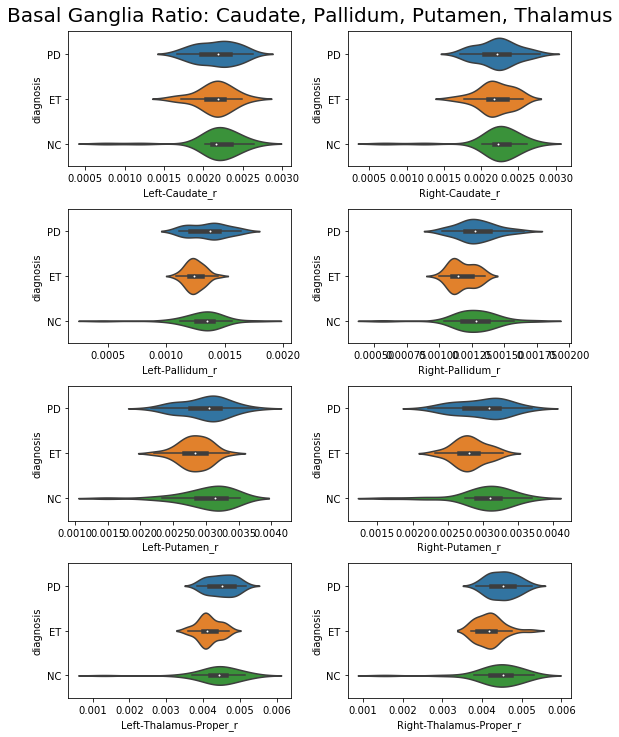

In [21]:
# distribution of basal ganglia
items_disp = ["diagnosis", "age", "sex", "eTIV", "Left-Caudate", "Right-Caudate",  'Left-Pallidum', 'Right-Pallidum', 
              'Left-Putamen', 'Right-Putamen', 'Left-Thalamus-Proper', 'Right-Thalamus-Proper']
tmp_data = tab_data.copy(); 
tmp_data=tmp_data[items_disp];
tmp_data["Caudate"]  = tab_data["Left-Caudate"] + tab_data["Right-Caudate"];
tmp_data["Pallidum"] = tab_data["Left-Pallidum"]+ tab_data["Right-Pallidum"];
tmp_data["Putamen"]  = tab_data["Left-Putamen"]+ tab_data["Right-Putamen"];
tmp_data["Thalamus-Proper"] = tab_data["Left-Thalamus-Proper"]+ tab_data["Right-Thalamus-Proper"];
items_disp_r = items_disp + ["Caudate", "Pallidum", "Thalamus-Proper", "Thalamus-Proper"]
items_disp_r = [x+"_r" for x in items_disp_r]
for i_feature in range(4, len(items_disp),1):
    tmp_data[items_disp_r[i_feature]] = tmp_data[items_disp[i_feature]]/tmp_data["eTIV"]
    
# SubCortGrayVol, Brain-Stem, Accumbens, CortexVol, TotalGrayVolCortexVol, CerebralWhiteMatterVol, EstimatedTotalIntraCranialVol
#
from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, 2, figsize=(8,10), tight_layout=1)
#
#ylim_1 = [1200,5500];
sns.violinplot(y="diagnosis", x=items_disp_r[4], data=tmp_data, orient='h', inner='box', ax=axs[0,0]); #axs[0,0].set_xlim(ylim_1);
sns.violinplot(y="diagnosis", x=items_disp_r[5], data=tmp_data, orient='h', inner='box', ax=axs[0,1]); #axs[0,1].set_xlim(ylim_1);
#ylim_2 = [1000,3500];
sns.violinplot(y="diagnosis", x=items_disp_r[6], data=tmp_data, orient='h', inner='box', ax= axs[1,0]); #axs[1,0].set_xlim(ylim_2);
sns.violinplot(y="diagnosis", x=items_disp_r[7], data=tmp_data, orient='h', inner='box', ax= axs[1,1]); #axs[1,1].set_xlim(ylim_2);
#ylim_3 = [2000,7500];
sns.violinplot(y="diagnosis", x=items_disp_r[8], data=tmp_data, orient='h', inner='box', ax= axs[2,0]); #axs[2,0].set_xlim(ylim_3);
sns.violinplot(y="diagnosis", x=items_disp_r[9], data=tmp_data, orient='h', inner='box', ax= axs[2,1]); #axs[2,1].set_xlim(ylim_3);
#ylim_4 = [2000,10000];
sns.violinplot(y="diagnosis", x=items_disp_r[10], data=tmp_data, orient='h', inner='box', ax= axs[3,0]); #axs[3,0].set_xlim(ylim_4);
sns.violinplot(y="diagnosis", x=items_disp_r[11], data=tmp_data, orient='h', inner='box', ax= axs[3,1]); #axs[3,1].set_xlim(ylim_4);
fig.suptitle('Basal Ganglia Ratio: Caudate, Pallidum, Putamen, Thalamus', fontsize = 20, x=0.5, y=1.02)
#axs[1].alpha=0.3
#plt.savefig('ad_group_corr_ic0.png')

In [ ]:
tmp_data

Text(0.5, 1.02, 'Basal Ganglia: Caudate, Pallidum, Putamen, Thalamus')

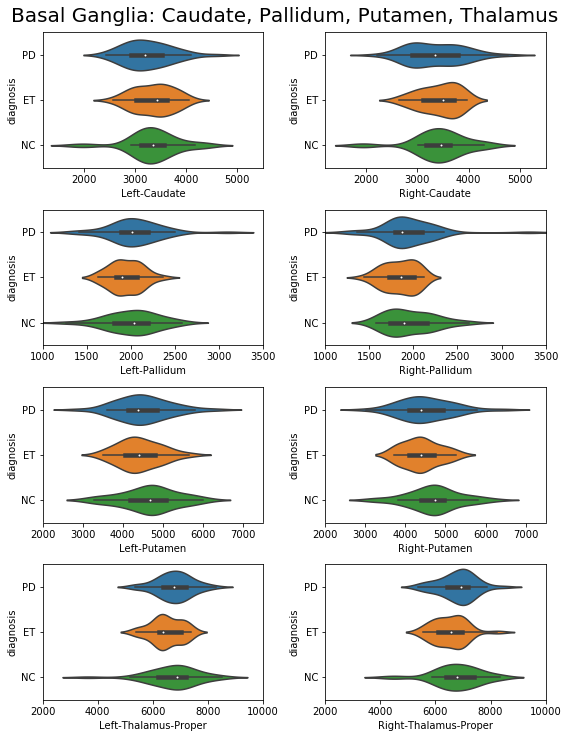

In [22]:
# distribution of basal ganglia
class_a1 = "Left-Caudate";  class_b1 = 'Left-Pallidum';  class_c1 = 'Left-Putamen';  class_d1 = 'Left-Thalamus-Proper';
class_a2 = "Right-Caudate"; class_b2 = 'Right-Pallidum'; class_c2 = 'Right-Putamen'; class_d2 = 'Right-Thalamus-Proper';
# SubCortGrayVol, Brain-Stem, Accumbens, CortexVol, TotalGrayVolCortexVol, CerebralWhiteMatterVol, EstimatedTotalIntraCranialVol


from matplotlib import pyplot as plt
fig, axs = plt.subplots(4, 2, figsize=(8,10), tight_layout=1)
#
ylim_1 = [1200,5500];
sns.violinplot(y="diagnosis", x=class_a1, data=tab_data, orient='h', inner='box', ax=axs[0,0]);  axs[0,0].set_xlim(ylim_1);
sns.violinplot(y="diagnosis", x=class_a2, data=tab_data, orient='h', inner='box', ax=axs[0,1]); axs[0,1].set_xlim(ylim_1);
ylim_2 = [1000,3500];
sns.violinplot(y="diagnosis", x=class_b1, data=tab_data, orient='h', inner='box', ax= axs[1,0]); axs[1,0].set_xlim(ylim_2);
sns.violinplot(y="diagnosis", x=class_b2, data=tab_data, orient='h', inner='box', ax= axs[1,1]); axs[1,1].set_xlim(ylim_2);
ylim_3 = [2000,7500];
sns.violinplot(y="diagnosis", x=class_c1, data=tab_data, orient='h', inner='box', ax= axs[2,0]); axs[2,0].set_xlim(ylim_3);
sns.violinplot(y="diagnosis", x=class_c2, data=tab_data, orient='h', inner='box', ax= axs[2,1]); axs[2,1].set_xlim(ylim_3);
ylim_4 = [2000,10000];
sns.violinplot(y="diagnosis", x=class_d1, data=tab_data, orient='h', inner='box', ax= axs[3,0]); axs[3,0].set_xlim(ylim_4);
sns.violinplot(y="diagnosis", x=class_d2, data=tab_data, orient='h', inner='box', ax= axs[3,1]); axs[3,1].set_xlim(ylim_4);
fig.suptitle('Basal Ganglia: Caudate, Pallidum, Putamen, Thalamus', fontsize = 20, x=0.5, y=1.02)
#axs[1].alpha=0.3
#plt.savefig('ad_group_corr_ic0.png')

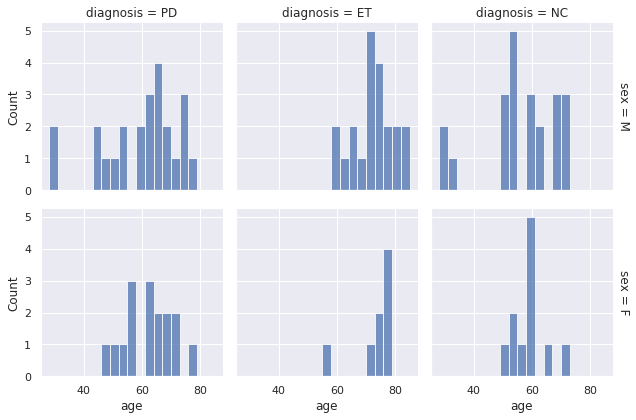

In [5]:
# test plots
import seaborn as sns
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    data, x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [ ]:
# plot tmp27 distribution 2*3
sns.set_theme(style="darkgrid")
sns.displot(
    data[''], x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [83]:
# template for 55-75, take first 19 of PD
res = sub_list.join(sf_lh, how='left')
res.join(vol_lh.iloc[:,0:-2], how='left')
sub_age57=sub_list[(sub_list['age']>=55) & (sub_list['age']<=75)]
import numpy as np
pd_57=list(sub_age57[sub_age57['diagnosis']=='PD'].index)[0:19]
et_57=list(sub_age57[sub_age57['diagnosis']=='ET'].index)
nc_57=list(sub_age57[sub_age57['diagnosis']=='NC'].index)
print('PD('+str(len(pd_57))+'): '+' '.join(pd_57))
print('ET('+str(len(et_57))+'): '+' '.join(et_57))
print('NC('+str(len(nc_57))+'): '+' '.join(nc_57))
sub_list57=pd_57+et_57+nc_57
sub57=sub_age57[sub_age57.index.isin(sub_list57)]
sub57.shape

PD(19): sub-0002 sub-0006 sub-0008 sub-0009 sub-0014 sub-0015 sub-0022 sub-0024 sub-0028 sub-0030 sub-0034 sub-0035 sub-0037 sub-0040 sub-0047 sub-0052 sub-0068 sub-0075 sub-0096
ET(19): sub-0081 sub-0119 sub-0122 sub-0134 sub-1120 sub-1230 sub-1310 sub-1340 sub-1450 sub-1500 sub-1890 sub-3700 sub-3900 sub-4200 sub-4700 sub-5700 sub-7000 sub-7400 sub-7800
NC(19): sub-0039 sub-0041 sub-0043 sub-0058 sub-0064 sub-0067 sub-0071 sub-0078 sub-0079 sub-0102 sub-0107 sub-0108 sub-0110 sub-0113 sub-0117 sub-0121 sub-0124 sub-0128 sub-0130


(57, 3)

In [160]:
## Preprocessing of freesurfer resutls
## Merging all PD/ET/NC freesurfer outputs into one table. /output/all_freesurfer_out.csv
#  reading subject list
import pandas as pd
import seaborn as sns
sub_list_file = '/codes/devel/subjects.list'
sub_list = pd.read_csv(sub_list_file, sep=',', header=0, index_col=0)

#reading freesurfer results
out_dir = '/output'
FS_DIR  = out_dir+'/freesurfer_output/'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
group_data={};
for i_group in range(n_groups):
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    sub_cortical_file = FS_DIR+GROUPS[i_group]+'/aseg_stats.txt';
    wm_file = FS_DIR+GROUPS[i_group]+'/wmparc_stats.txt'; 
    lh_area_file      = FS_DIR+GROUPS[i_group]+'/lh.a2009s.area.txt';      rh_area_file      = FS_DIR+GROUPS[i_group]+'/rh.a2009s.area.txt';
    lh_meancurv_file  = FS_DIR+GROUPS[i_group]+'/lh.a2009s.meancurv.txt';  rh_meancurv_file  = FS_DIR+GROUPS[i_group]+'/rh.a2009s.meancurv.txt';
    lh_thickness_file = FS_DIR+GROUPS[i_group]+'/lh.a2009s.thickness.txt'; rh_thickness_file = FS_DIR+GROUPS[i_group]+'/rh.a2009s.thickness.txt';
    lh_volume_file    = FS_DIR+GROUPS[i_group]+'/lh.a2009s.volume.txt';    rh_volume_file   = FS_DIR+GROUPS[i_group]+'/rh.a2009s.volume.txt';
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"];
    wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    area_drop1 = ["BrainSegVolNotVent"];                   area_drop2 = ["BrainSegVolNotVent", "eTIV"];
    meancurv_drop1  = ["BrainSegVolNotVent", "eTIV"];  meancurv_drop2 = ["BrainSegVolNotVent", "eTIV"];
    thickness_drop1 = ["BrainSegVolNotVent", "eTIV"]; thickness_drop2 = ["BrainSegVolNotVent", "eTIV"];
    volume_drop1    = ["BrainSegVolNotVent", "eTIV"];    volume_drop2 = ["BrainSegVolNotVent", "eTIV"];
    ##
    subcortical_tab  = pd.read_csv(sub_cortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res    = sub_list.join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    lh_area_tab = pd.read_csv(lh_area_file, sep='\t', header=0, index_col=0); lh_area_tab.drop(area_drop1, axis=1, inplace=True);
    rh_area_tab = pd.read_csv(rh_area_file, sep='\t', header=0, index_col=0); rh_area_tab.drop(area_drop2, axis=1, inplace=True);
    res2 = res1.join(lh_area_tab, how='left'); res3 = res2.join(rh_area_tab, how='left');
    lh_meancurv_tab = pd.read_csv(lh_meancurv_file, sep='\t', header=0, index_col=0); lh_meancurv_tab.drop(meancurv_drop1, axis=1, inplace=True);
    rh_meancurv_tab = pd.read_csv(rh_meancurv_file, sep='\t', header=0, index_col=0); rh_meancurv_tab.drop(meancurv_drop2, axis=1, inplace=True);
    res4 = res3.join(lh_meancurv_tab, how='left'); res5 = res4.join(rh_meancurv_tab, how='left');
    lh_thickness_tab = pd.read_csv(lh_thickness_file, sep='\t', header=0, index_col=0); lh_thickness_tab.drop(thickness_drop1, axis=1, inplace=True);
    rh_thickness_tab = pd.read_csv(rh_thickness_file, sep='\t', header=0, index_col=0); rh_thickness_tab.drop(thickness_drop2, axis=1, inplace=True);
    res6 = res5.join(lh_thickness_tab, how='left'); res7 = res6.join(rh_thickness_tab, how='left');
    lh_volume_tab = pd.read_csv(lh_volume_file, sep='\t', header=0, index_col=0); lh_volume_tab.drop(volume_drop1, axis=1, inplace=True);
    rh_volume_tab = pd.read_csv(rh_volume_file, sep='\t', header=0, index_col=0); rh_volume_tab.drop(volume_drop2, axis=1, inplace=True);
    res8 = res7.join(lh_volume_tab, how='left'); res9 = res8.join(rh_volume_tab, how='left');
    group_data[GROUPS[i_group]]=res9[res9['diagnosis']==GROUPS[i_group]]
all_data = pd.concat([group_data['PD'], group_data['ET'], group_data['NC']])
all_data.to_csv(out_dir+'/freesurfer_out.csv')

Reading  PD  freesurfer stats data...
Reading  ET  freesurfer stats data...
Reading  NC  freesurfer stats data...


/usr/local/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:47: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [17]:
# cre
import pandas as pd
import seaborn as sns
#reading freesurfer results
def eqStr(x, str_y):
    if x == str_y:
        return 1
    else:
        return 0
out_dir = '/output'
fsdata_file = out_dir+'/freesurfer_out.csv'
GROUPS  = ['PD','ET','NC']
n_groups = len(GROUPS);
tab_data = pd.read_csv(fsdata_file, sep=',', header=0, index_col=0);
tab_data["is_PD"] = [eqStr(x, "PD") for x in tab_data["diagnosis"]];
tab_data["is_ET"] = [eqStr(x, "ET") for x in tab_data["diagnosis"]];
tab_data["is_NC"] = [eqStr(x, "NC") for x in tab_data["diagnosis"]];
tab_data["is_Male"] = [eqStr(x, "M") for x in tab_data["sex"]];
tab_data["is_Female"] = [eqStr(x, "F") for x in tab_data["sex"]];
tab_data.to_csv(out_dir+'/freesurfer_out_preped.csv')
tab_data[["is_PD","is_ET","is_NC","is_Male","is_Female"]] 

,is_PD,is_ET,is_NC,is_Male,is_Female
id,,,,,
sub-0002,1,0,0,1,0
sub-0004,1,0,0,0,1
sub-0005,1,0,0,1,0
sub-0006,1,0,0,0,1
sub-0008,1,0,0,1,0
sub-0009,1,0,0,0,1
sub-0012,1,0,0,1,0
sub-0014,1,0,0,1,0
sub-0015,1,0,0,0,1


,is_PD,is_ET,is_NC,is_male,is_female
id,,,,,
sub-0002,1,0,0,1,0
sub-0004,1,0,0,0,1
sub-0005,1,0,0,1,0
sub-0006,1,0,0,0,1
sub-0008,1,0,0,1,0
sub-0009,1,0,0,0,1
sub-0012,1,0,0,1,0
sub-0014,1,0,0,1,0
sub-0015,1,0,0,0,1


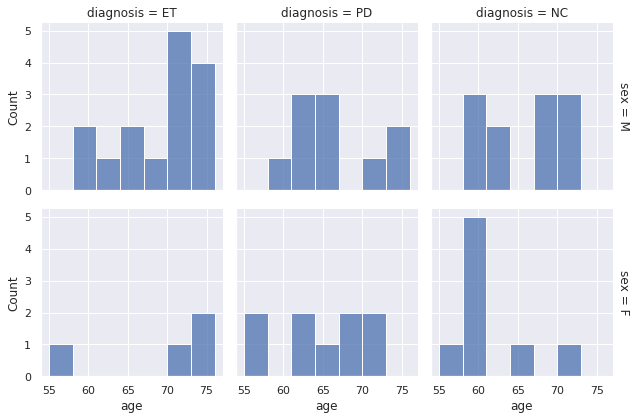

In [84]:
# plot tmp27 distribution 2*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    sub57, x="age", col="diagnosis", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

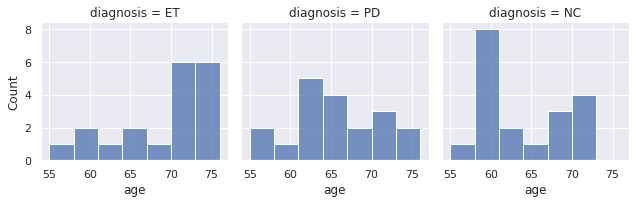

In [85]:
# plot tmp27 distribution 1*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(
    sub57, x="age", col="diagnosis",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

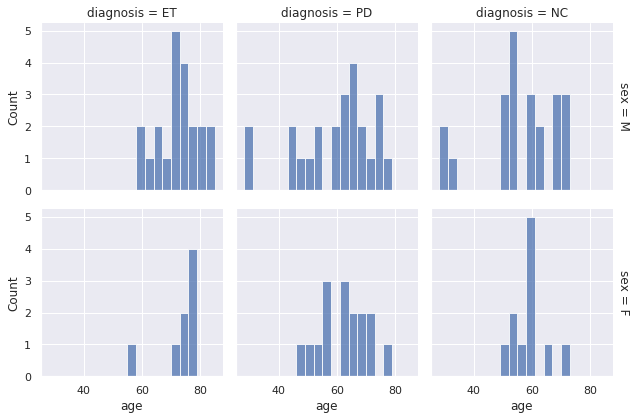

In [90]:
# plot all subject distribution 2*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
ax1=sns.displot(res, x="age", col="diagnosis", row="sex",
                binwidth=3, height=3, facet_kws=dict(margin_titles=True))

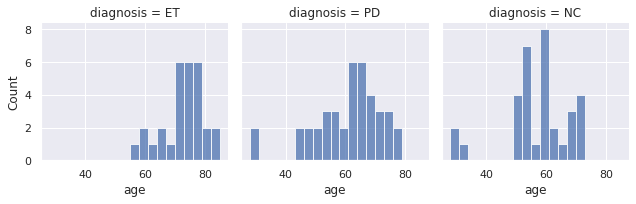

In [91]:
# plot all subject distribution 1*3
sns.set_theme(style="darkgrid")
df = sns.load_dataset("penguins")
sns.displot(res, x="age", col="diagnosis",
            binwidth=3, height=3, facet_kws=dict(margin_titles=True))